<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22489348 entries, 0 to 22489347
Data columns (total 11 columns):
 #   Column                             Dtype 
---  ------                             ----- 
 0   Transaction unique identifier      object
 1   Price                              int64 
 2   Date of Transfer                   object
 3   Property Type                      object
 4   Old/New                            object
 5   Duration                           object
 6   Town/City                          object
 7   District                           object
 8   County                             object
 9   PPDCategory Type                   object
 10  Record Status - monthly file only  object
dtypes: int64(1), object(10)
memory usage: 1.8+ GB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22489348 entries, 0 to 22489347
Data columns (total 11 columns):
 #   Column                             Dtype         
---  ------                             -----        

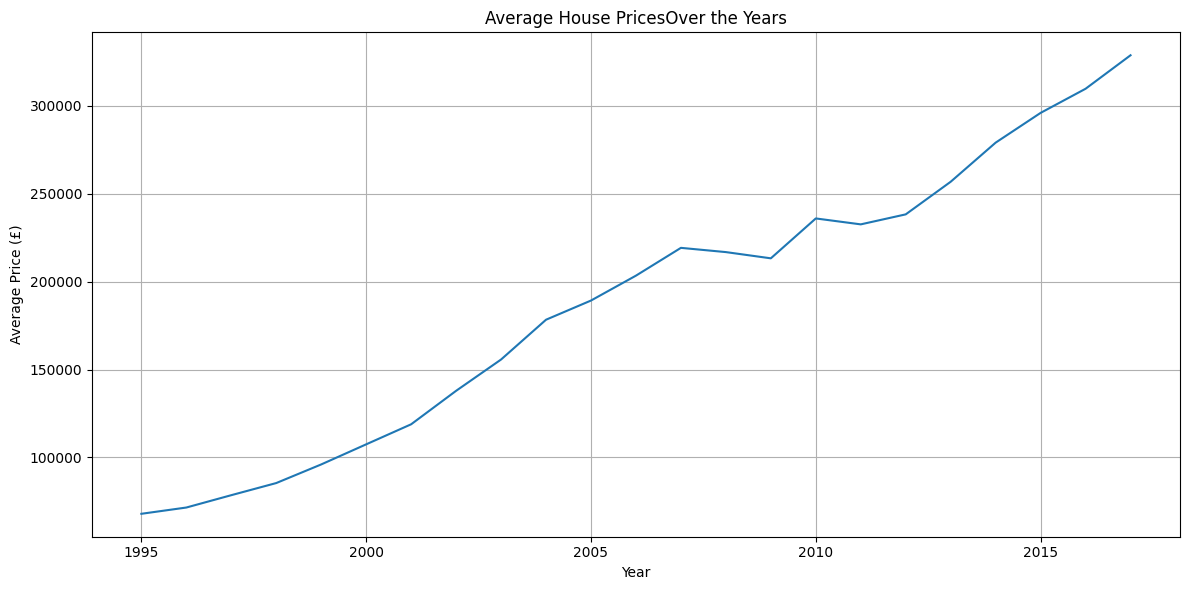

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22489348 entries, 0 to 22489347
Data columns (total 13 columns):
 #   Column                             Dtype         
---  ------                             -----         
 0   Transaction unique identifier      object        
 1   Price                              int64         
 2   Date of Transfer                   datetime64[ns]
 3   Property Type                      object        
 4   Old/New                            object        
 5   Duration                           object        
 6   Town/City                          object        
 7   District                           object        
 8   County                             object        
 9   PPDCategory Type                   object        
 10  Record Status - monthly file only  object        
 11  Year                               int32         
 12  Month                              int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(9)
mem

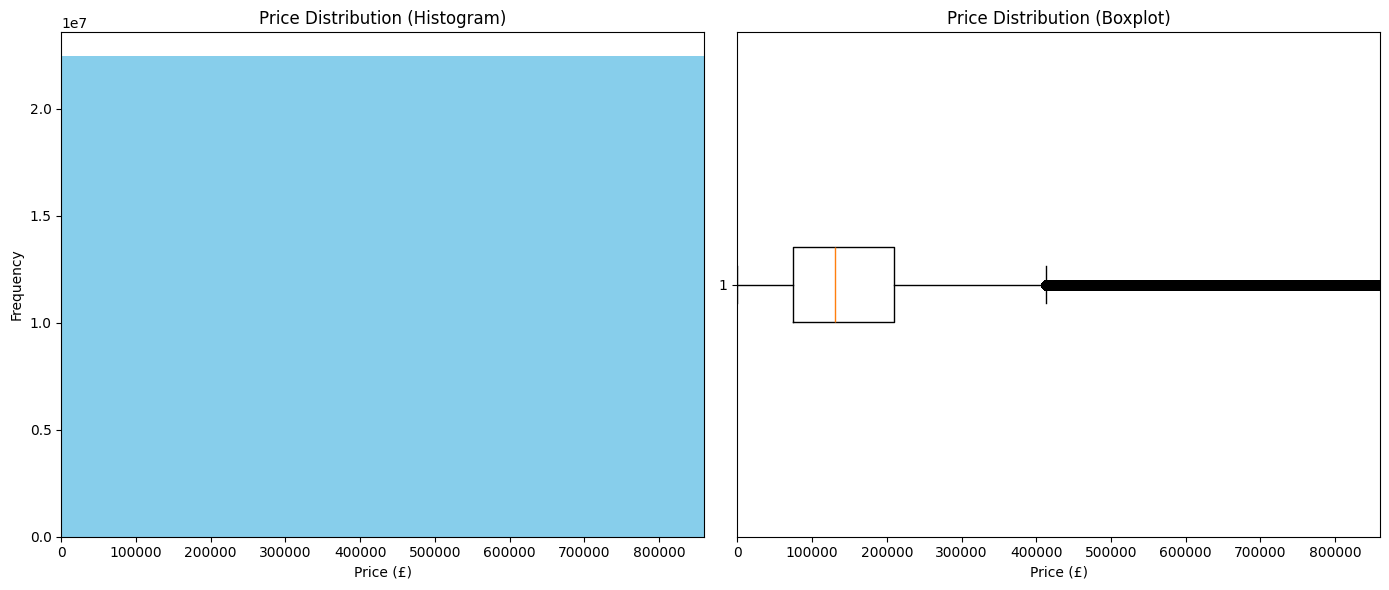

Unique Duration values: ['F' 'L' 'U']
Unique Old/New values: ['N' 'Y']
   Property Type  Old/New  Duration  PPDCategory Type
0              4        0         0                 0
1              3        0         0                 0
2              4        0         0                 0
3              4        0         0                 0
4              3        0         0                 0


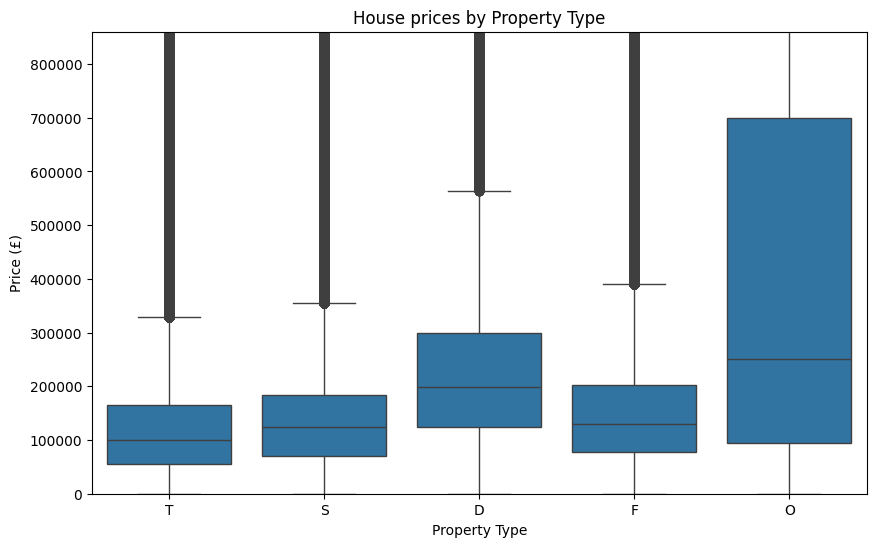

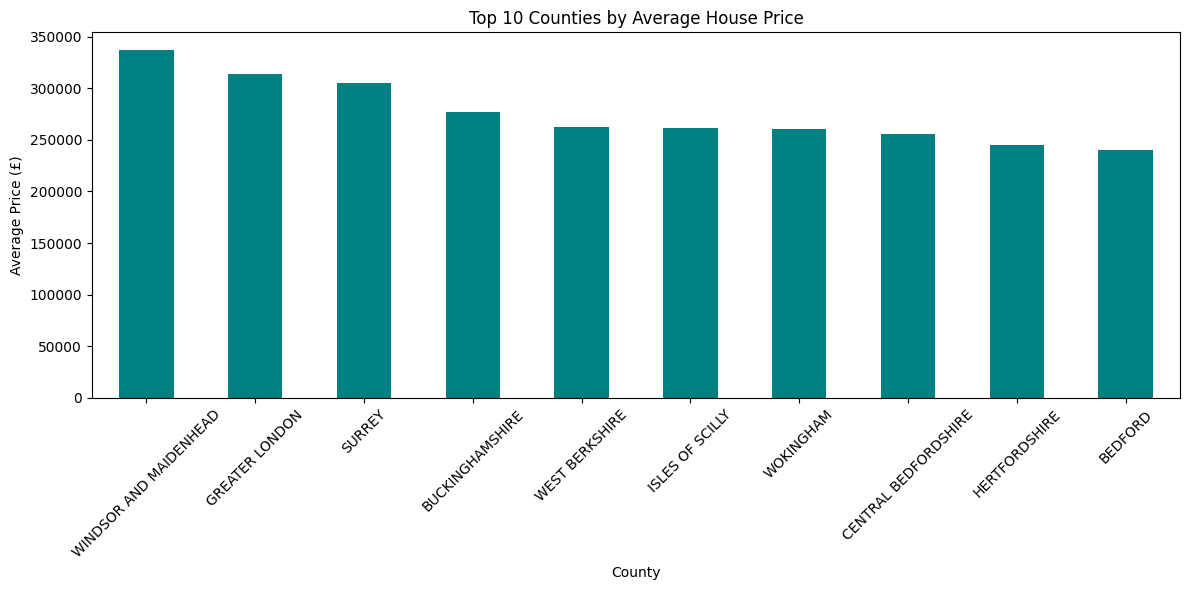

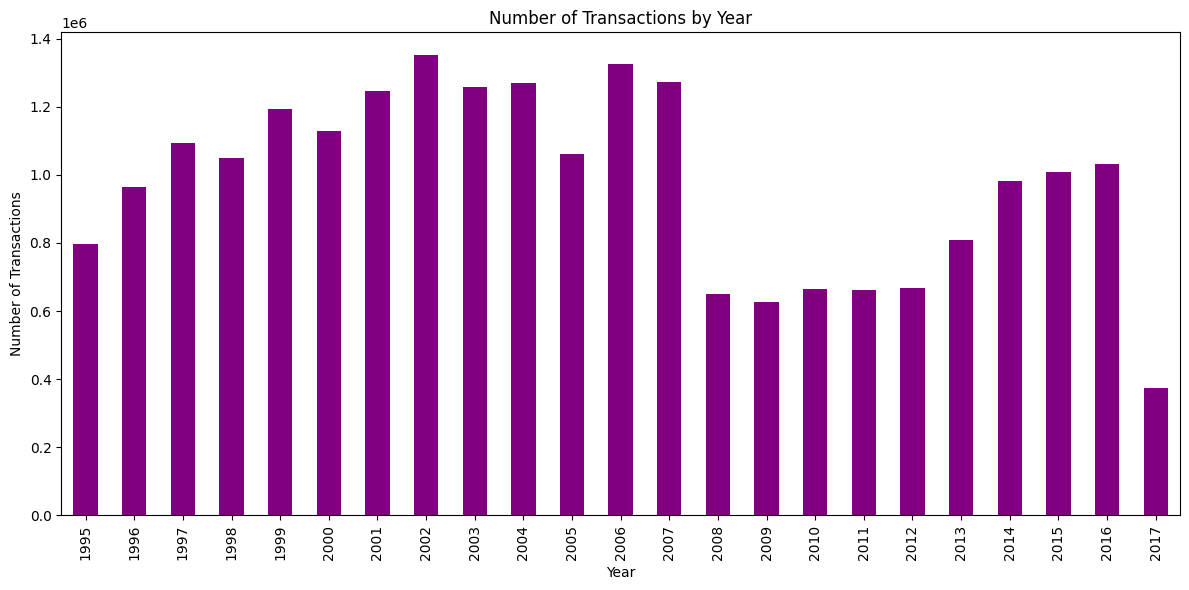

    Month  Season
0       8  Summer
1       8  Summer
2       6  Summer
3      11  Autumn
4       6  Summer
5       5  Spring
6       3  Spring
7       3  Spring
8       6  Summer
9       5  Spring
10      5  Spring
11      1  Winter


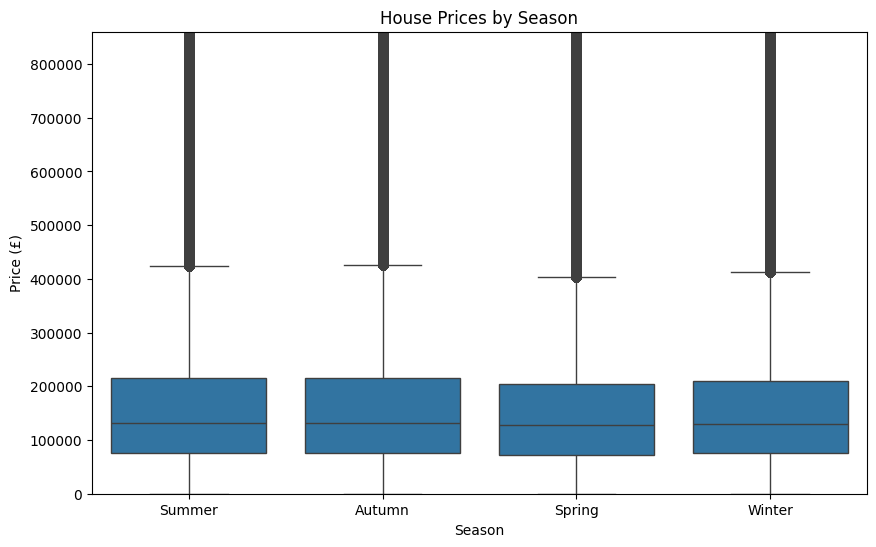

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
df = pd.read_csv('/Users/dixchyaregmi/Downloads/price_paid_records.csv')
df.head()
df.info()
df['Date of Transfer'] = pd.to_datetime(df['Date of Transfer'])
df.info()
df.dtypes
df['Year'] = df['Date of Transfer'].dt.year
df['Month'] = df['Date of Transfer'].dt.month
df[['Date of Transfer', 'Year', 'Month']].head()
avg_price_per_year = df.groupby('Year')['Price'].mean()
plt.figure(figsize=(12, 6))
avg_price_per_year.plot(kind='line')
plt.title('Average House PricesOver the Years')
plt.xlabel('Year')
plt.ylabel('Average Price (£)')
plt.grid(True)
plt.tight_layout()
plt.show()
df.describe()
df.isnull().sum()
df.duplicated().sum()
df.info()
df.drop(columns=['Transaction unique identifier', 'Record Status - monthly file only'], inplace=True)
df.info()
print(df.describe())
print(df.isnull().sum())
print(f"Duplicate rows: {df.duplicated().sum()}")
print(df['Property Type'].value_counts())
print(df['Duration'].value_counts())
print(df['Old/New'].value_counts())
print(df['Town/City'].value_counts().head(10))
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)
plt.hist(df['Price'], bins=50, color='skyblue')
plt.title('Price Distribution (Histogram)')
plt.xlabel('Price (£)')
plt.ylabel('Frequency')
plt.xlim(0, df['Price'].quantile(0.99))
plt.subplot(1, 2, 2)
plt.boxplot(df['Price'], vert=False)
plt.title('Price Distribution (Boxplot)')
plt.xlabel('Price (£)')
plt.xlim(0, df['Price'].quantile(0.99))
plt.tight_layout()
plt.show()
print("Unique Duration values:", df['Duration'].unique())
print("Unique Old/New values:", df['Old/New'].unique())
df_encoded = df.copy()
le = LabelEncoder()
label_cols = ['Property Type', 'Old/New', 'Duration', 'PPDCategory Type']
for col in label_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])
print(df_encoded[label_cols].head())
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Property Type', y='Price')
plt.ylim(0, df['Price'].quantile(0.99))
plt.title('House prices by Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price (£)')
plt.show()
avg_price_by_county = df.groupby('County')['Price'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(12, 6))
avg_price_by_county.plot(kind='bar', color='teal')
plt.title('Top 10 Counties by Average House Price')
plt.ylabel('Average Price (£)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
plt.figure(figsize=(12, 6)) 
df['Year'].value_counts().sort_index().plot(kind='bar', color='purple')
plt.title('Number of Transactions by Year')
plt.xlabel('Year')
plt.ylabel('Number of Transactions')
plt.tight_layout()
plt.show()
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Autumn'
    
df['Season'] = df['Month'].apply(get_season)
print(df[['Month', 'Season']].head(12))
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Season', y='Price')
plt.ylim(0, df['Price'].quantile(0.99))
plt.title('House Prices by Season')
plt.xlabel('Season')
plt.ylabel('Price (£)')
plt.show()
df['Season'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Number of Transactions by Season')
plt.xlabel('Season')
plt.ylabel('Number of Transactions')
plt.show()